# Demanda

In [1]:
import pandas as pd
import numpy as np


In [ ]:
file = "data/HISTORIAL MENSUAL COMAS 2025.xlsx"
df = pd.read_excel(file)
df = df.iloc[:-1]  # Skip the last row
# Convert the first row to column names 
df

,Proyecto,Periodo,Total en Ventas,Total en % Contratos,Total en % Caídas,Total en Contratos,Total en Caídas,Total SB Sin Firmar,Precio Prom m2,Precio Venta (Promedio)
0,Cerezos Club Residencial,Total,82,0.585366,0.158537,48,13.0,21.0,3718.370459,257413.344000
1,Cerezos Club Residencial,2025-01,17,0.705882,0.294118,12,5.0,NaN,3737.655062,274717.647059
2,Cerezos Club Residencial,2025-02,17,0.823529,0.176471,14,3.0,NaN,3568.153628,245064.326923
3,Cerezos Club Residencial,2025-03,22,0.500000,0.181818,11,4.0,7.0,3640.364091,251762.222222
4,Cerezos Club Residencial,2025-04,14,0.571429,0.071429,8,1.0,5.0,3976.566252,274481.818182
5,Cerezos Club Residencial,2025-05,12,0.250000,NaN,3,NaN,9.0,3678.755566,249692.857143
6,Acacias Villa Residencial 52,Total,2,1.000000,NaN,2,NaN,NaN,3214.891612,170550.000000
7,Acacias Villa Residencial 52,2025-01,1,1.000000,NaN,1,NaN,NaN,3274.269557,173700.000000
8,Acacias Villa Residencial 52,2025-02,1,1.000000,NaN,1,NaN,NaN,3155.513666,167400.000000
9,Acacias Villa Residencial 60,Total,71,0.690141,0.267606,49,19.0,3.0,3377.350985,211877.767183


# Análisis de demanda

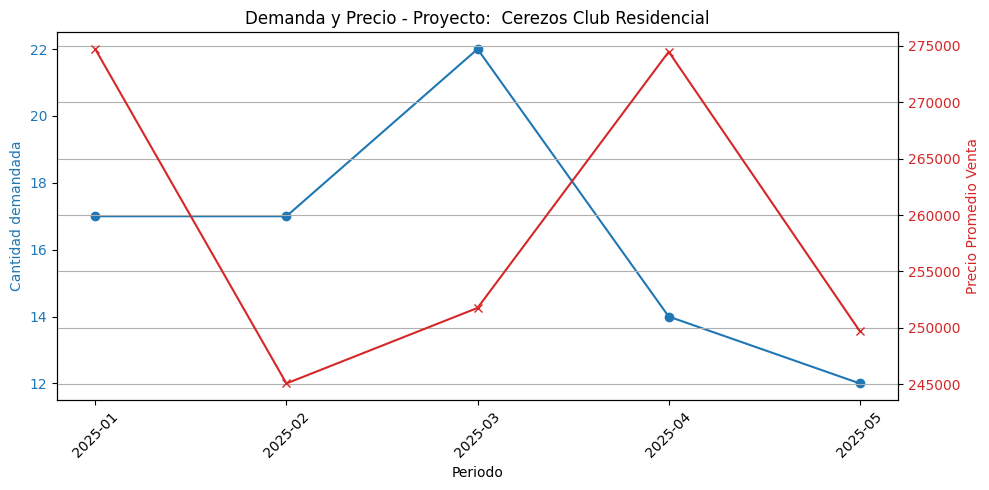

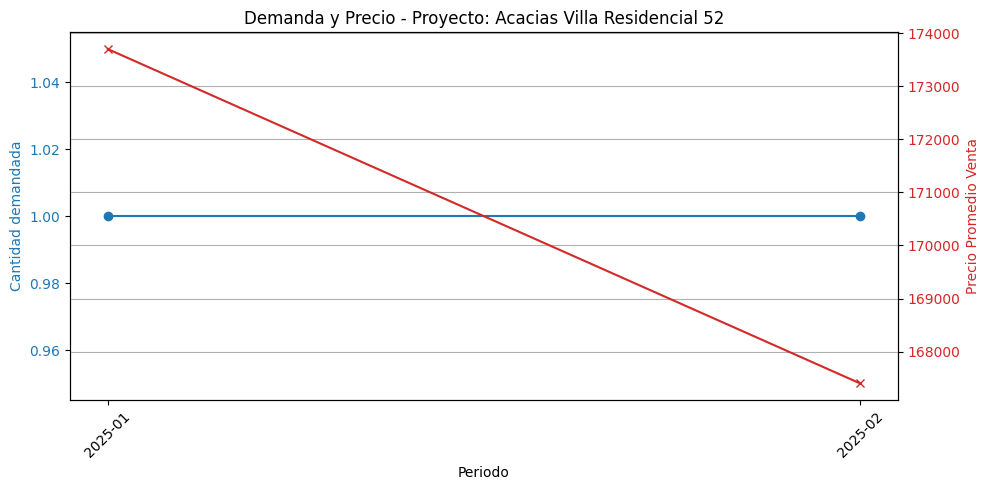

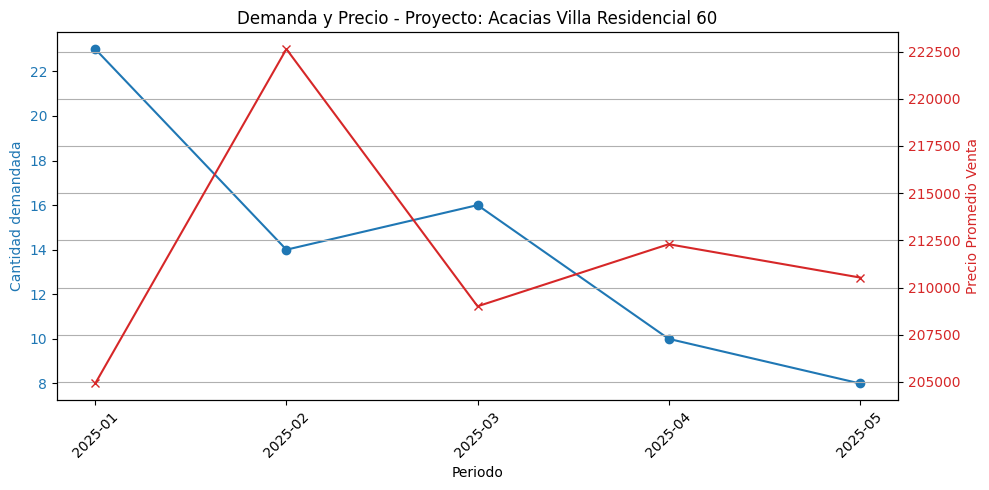

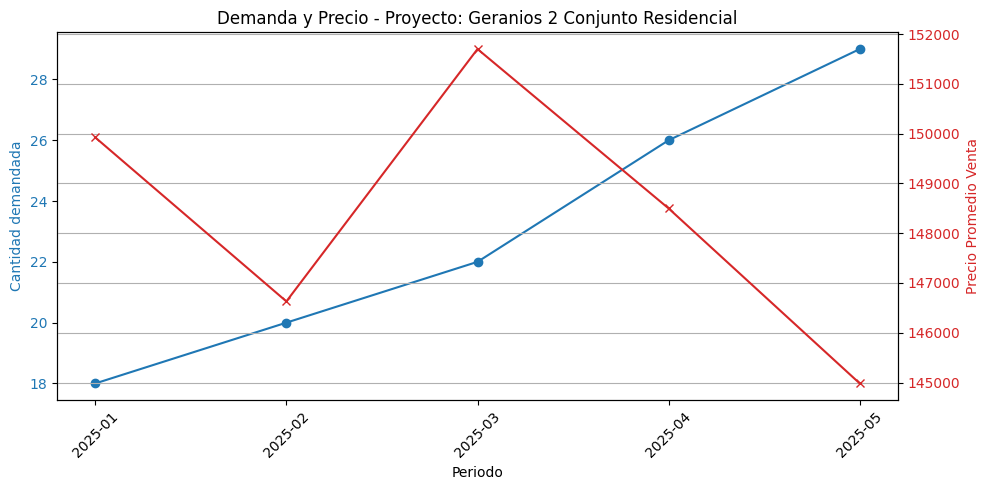

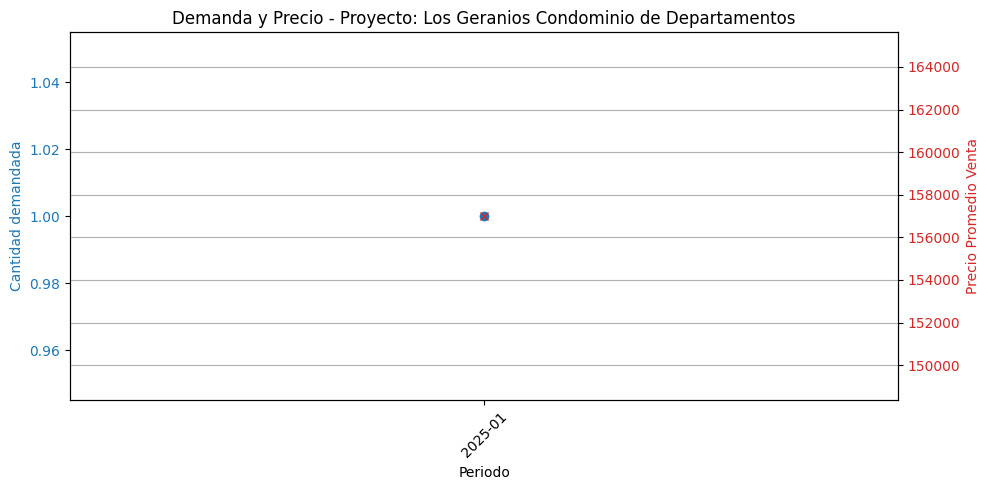

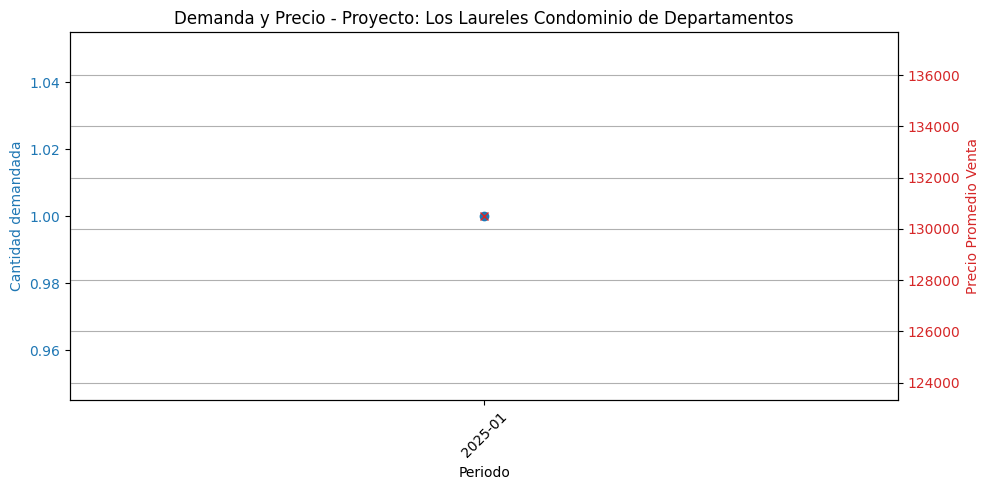

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

class AnalisisDemanda:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = pd.read_excel(file_path, sheet_name="Export")
        self.df = self.df.iloc[:-1]  # Skip the first row
        self.proyectos = self.df['Proyecto'].unique()

    def graficar_demanda(self, proyecto, cantidad_col='Total en Ventas', precio_col='Precio Venta (Promedio)'):
        df_proj = self.df[self.df['Proyecto'] == proyecto].copy()
        df_proj = df_proj[df_proj['Periodo'] != "Total"]
        df_proj = df_proj.sort_values('Periodo')
        
        fig, ax1 = plt.subplots(figsize=(10,5))
        
        ax1.set_xlabel('Periodo')
        ax1.set_ylabel('Cantidad demandada', color='tab:blue')
        ax1.plot(df_proj['Periodo'], df_proj[cantidad_col], marker='o', color='tab:blue', label='Cantidad demandada')
        ax1.tick_params(axis='y', labelcolor='tab:blue')
        plt.xticks(rotation=45)
        
        # Graficar precio en el mismo gráfico, segundo eje Y
        ax2 = ax1.twinx()
        ax2.set_ylabel('Precio Promedio Venta', color='tab:red')
        ax2.plot(df_proj['Periodo'], df_proj[precio_col], marker='x', color='tab:red', label='Precio Promedio Venta')
        ax2.tick_params(axis='y', labelcolor='tab:red')
        
        plt.title(f'Demanda y Precio - Proyecto: {proyecto}')
        fig.tight_layout()
        plt.grid(True)
        plt.show()
    
    def graficar_todos(self):
        for proyecto in self.proyectos:
            self.graficar_demanda(proyecto)

# Uso
analisis = AnalisisDemanda("data/HISTORIAL MENSUAL COMAS 2025.xlsx")
analisis.graficar_todos()  # Grafica para todos los proyectos
